In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Loading the dataset

In [445]:
df = pd.read_csv('netflix.csv')

In [446]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [447]:
df.shape

(8807, 12)

In [448]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [449]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [450]:
print('Types of ratings:',df['rating'].unique())

Types of ratings: ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


In [451]:
print('Number of Movies:',
      df[df['type'] == 'Movie']['duration'].count(),
      '\nShow Durations:',
      df[df['type'] == 'Movie']['duration'].unique())

Number of Movies: 6128 
Show Durations: ['90 min' '91 min' '125 min' '104 min' '127 min' '67 min' '94 min'
 '161 min' '61 min' '166 min' '147 min' '103 min' '97 min' '106 min'
 '111 min' '110 min' '105 min' '96 min' '124 min' '116 min' '98 min'
 '23 min' '115 min' '122 min' '99 min' '88 min' '100 min' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '64 min' '59 min' '139 min' '69 min' '148 min' '189 min'
 '141 min' '130 min' '138 min' '81 min' '132 min' '123 min' '65 min'
 '68 min' '66 min' '62 min' '74 min' '131 min' '39 min' '46 min' '38 min'
 '126 min' '155 min' '159 min' '137 min' '12 min' '273 mi

In [452]:
print('Number of Shows:',
      df[df['type'] == 'TV Show']['duration'].count(),
      '\nShow Durations:',
      df[df['type'] == 'TV Show']['duration'].unique())

Number of Shows: 2676 
Show Durations: ['2 Seasons' '1 Season' '9 Seasons' '4 Seasons' '5 Seasons' '3 Seasons'
 '6 Seasons' '7 Seasons' '10 Seasons' '8 Seasons' '17 Seasons'
 '13 Seasons' '15 Seasons' '12 Seasons' '11 Seasons']


<h4>Observations</h4>

<ul>
    <li>A lot of null values, especially for director, cast and country</li>
    <li>Rating isn't the popularity, but the suggested audience of a movie/film</li>
    <li>Listed In is essntially the genre list</li>
    <li>Duration is kept in two different metrics, time for movies and seasons for shows</li>
</ul>

# Preprocessing & Visualization

<h3>General</h3>

Dropping Director, Cast, and Country, due to the amoung of null values and how unlikely it is that they will have a significant effect on future models

In [453]:
df = df.drop(['director', 'cast', 'country'], axis=1)

Dropping duration column, as two different metrics are used depending on whether the item is a show or a movie. Another solution would be to split the dataset into movies and shows, but we want to be able to recommend either.

In [454]:
df = df.drop('duration', axis=1)

Dropping date added, since it has little relevance

In [455]:
df = df.drop('date_added', axis=1)

In [456]:
df.isnull().sum()

show_id         0
type            0
title           0
release_year    0
rating          4
listed_in       0
description     0
dtype: int64

Renaming two-word column names for ease

In [457]:
df = df.rename({'release_year':'year'}, axis=1)
df = df.rename({'listed_in':'category'}, axis=1)
df = df.rename({'show_id':'id'}, axis=1)

In [458]:
df[df['rating'].isnull()].head()

,id,type,title,year,rating,category,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,2017,NaN,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,2013,NaN,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,2015,NaN,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,2015,NaN,Dramas,"Amid the chaos and horror of World War II, a c..."


Looking at the remaining null values, which is the four null ratings, it is low enough that we can drop those in order to simplify the computations being done

In [459]:
df = df.dropna()

In [460]:
df.shape

(8803, 7)

<h3>RS Processing</h3>

One hot encoding the comma seperated list of genres, preparing dataframe for recommendation system

In [461]:
rating_enc = pd.get_dummies(df['rating'], prefix='rating')
type_enc = pd.get_dummies(df['type'], prefix='type')
df_enc = pd.concat([df, rating_enc, type_enc], axis=1)
df_enc = df_enc.drop(['rating', 'type'], axis=1)

In [462]:
df_genres = df_enc.copy()
df_genres['category'] = df_genres['category'].str.replace(' ', '')
df_genres = df_genres.join(pd.concat([df_genres['category'].str.get_dummies(sep=',')])).drop('category', axis=1)

In [463]:
pd.set_option('display.max_columns', None)
df_enc

,id,title,year,category,description,rating_66 min,rating_74 min,rating_84 min,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,type_Movie,type_TV Show
0,s1,Dick Johnson Is Dead,2020,Documentaries,"As her father nears the end of his life, filmm...",False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,s2,Blood & Water,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
2,s3,Ganglands,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
3,s4,Jailbirds New Orleans,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
4,s5,Kota Factory,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Zodiac,2007,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
8803,s8804,Zombie Dumb,2018,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
8804,s8805,Zombieland,2009,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
8805,s8806,Zoom,2006,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


<h4>Renaming columns</h4>

Noticing a lot of redundancy between categories, especially to split movies and shows. I am going to essentially merge the two

In [464]:
def getFirstRow(df,feature):
    return df[df[feature] == 1].head(1)

In [465]:
def getRow(df,id):
    return df.loc[df_enc['id'] == id]

In [466]:
df_enc.columns

Index(['id', 'title', 'year', 'category', 'description', 'rating_66 min',
       'rating_74 min', 'rating_84 min', 'rating_G', 'rating_NC-17',
       'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R', 'rating_TV-14',
       'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y',
       'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR', 'type_Movie',
       'type_TV Show'],
      dtype='object')

<h5>Anime</h5>

In [467]:
getFirstRow(df_genres,'AnimeFeatures')

,id,title,year,description,rating_66 min,rating_74 min,rating_84 min,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,type_Movie,type_TV Show,Action&Adventure,AnimeFeatures,AnimeSeries,BritishTVShows,Children&FamilyMovies,Classic&CultTV,ClassicMovies,Comedies,CrimeTVShows,CultMovies,Documentaries,Docuseries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids'TV,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
51,s52,InuYasha the Movie 2: The Castle Beyond the Lo...,2002,"With their biggest foe seemingly defeated, Inu...",False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [468]:
df_genres = df_genres.rename({'AnimeFeatures':'Anime'}, axis=1)
df_genres.loc[df_genres['AnimeSeries'] == 1, 'Anime'] = 1
df_genres = df_genres.drop('AnimeSeries', axis=1)

In [469]:
getRow(df_genres,'s77')

,id,title,year,description,rating_66 min,rating_74 min,rating_84 min,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,type_Movie,type_TV Show,Action&Adventure,Anime,BritishTVShows,Children&FamilyMovies,Classic&CultTV,ClassicMovies,Comedies,CrimeTVShows,CultMovies,Documentaries,Docuseries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids'TV,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
76,s77,Yowamushi Pedal,2013,"A timid, anime-loving teen gets drawn into a s...",False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h5>Classical and Cult</h5>

In [470]:
getFirstRow(df_genres,'Classic&CultTV')

,id,title,year,description,rating_66 min,rating_74 min,rating_84 min,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,type_Movie,type_TV Show,Action&Adventure,Anime,BritishTVShows,Children&FamilyMovies,Classic&CultTV,ClassicMovies,Comedies,CrimeTVShows,CultMovies,Documentaries,Docuseries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids'TV,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
390,s391,The Walking Dead,2019,"In the wake of a zombie apocalypse, survivors ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [471]:
# Spilling Classic and Cult into two, assigning Classic&Cult to both, then comboning classicTV and classicMovies
df_genres = df_genres.rename({'Classic&CultTV':'Classic'}, axis=1)

df_genres = df_genres.rename({'CultMovies':'Cult'}, axis=1)
df_genres.loc[df_genres['Classic'] == 1, 'Cult'] = 1

df_genres.loc[df_genres['ClassicMovies'] == 1, 'Classic'] = 1
df_genres = df_genres.drop('ClassicMovies', axis=1)

In [472]:
getRow(df_genres,'s391')

,id,title,year,description,rating_66 min,rating_74 min,rating_84 min,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,type_Movie,type_TV Show,Action&Adventure,Anime,BritishTVShows,Children&FamilyMovies,Classic,Comedies,CrimeTVShows,Cult,Documentaries,Docuseries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids'TV,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
390,s391,The Walking Dead,2019,"In the wake of a zombie apocalypse, survivors ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


<h5>Documentaries</h5>

In [473]:
getFirstRow(df_genres,'Docuseries')

,id,title,year,description,rating_66 min,rating_74 min,rating_84 min,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,type_Movie,type_TV Show,Action&Adventure,Anime,BritishTVShows,Children&FamilyMovies,Classic,Comedies,CrimeTVShows,Cult,Documentaries,Docuseries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids'TV,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
3,s4,Jailbirds New Orleans,2021,"Feuds, flirtations and toilet talk go down amo...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [474]:
df_genres.loc[df_genres['Docuseries'] == 1, 'Documentaries'] = 1
df_genres = df_genres.drop('Docuseries', axis=1)

In [475]:
getRow(df_genres,'s4')

,id,title,year,description,rating_66 min,rating_74 min,rating_84 min,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,type_Movie,type_TV Show,Action&Adventure,Anime,BritishTVShows,Children&FamilyMovies,Classic,Comedies,CrimeTVShows,Cult,Documentaries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids'TV,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
3,s4,Jailbirds New Orleans,2021,"Feuds, flirtations and toilet talk go down amo...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h5>Family/Kids</h5>

In [476]:
getFirstRow(df_genres,'Children&FamilyMovies')

,id,title,year,description,rating_66 min,rating_74 min,rating_84 min,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,type_Movie,type_TV Show,Action&Adventure,Anime,BritishTVShows,Children&FamilyMovies,Classic,Comedies,CrimeTVShows,Cult,Documentaries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids'TV,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
6,s7,My Little Pony: A New Generation,2021,Equestria's divided. But a bright-eyed hero be...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [477]:
# Essentially, splitting Family and Children/Kids categories and adding Children&Family to both
df_genres = df_genres.rename({'Children&FamilyMovies':'Family'}, axis=1)
df_genres = df_genres.rename({"Kids'TV":'Kids'}, axis=1)

df_genres.loc[df_genres['Family'] == 1, 'Kids'] = 1

In [478]:
getRow(df_genres,'s7')

,id,title,year,description,rating_66 min,rating_74 min,rating_84 min,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,type_Movie,type_TV Show,Action&Adventure,Anime,BritishTVShows,Family,Classic,Comedies,CrimeTVShows,Cult,Documentaries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
6,s7,My Little Pony: A New Generation,2021,Equestria's divided. But a bright-eyed hero be...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h5>International</h5>

In [479]:
getFirstRow(df_genres,'InternationalMovies')

,id,title,year,description,rating_66 min,rating_74 min,rating_84 min,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,type_Movie,type_TV Show,Action&Adventure,Anime,BritishTVShows,Family,Classic,Comedies,CrimeTVShows,Cult,Documentaries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
7,s8,Sankofa,1993,"On a photo shoot in Ghana, an American model s...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [480]:
df_genres = df_genres.rename({'InternationalMovies':'International'}, axis=1)
df_genres.loc[df_genres['InternationalTVShows'] == 1, 'International'] = 1
df_genres = df_genres.drop('InternationalTVShows', axis=1)

In [481]:
getRow(df_genres,'s8')

,id,title,year,description,rating_66 min,rating_74 min,rating_84 min,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,type_Movie,type_TV Show,Action&Adventure,Anime,BritishTVShows,Family,Classic,Comedies,CrimeTVShows,Cult,Documentaries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,International,Kids,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
7,s8,Sankofa,1993,"On a photo shoot in Ghana, an American model s...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h5>Comedy And Talk Shows</h5>

In [482]:
getFirstRow(df_genres,'Stand-UpComedy')

,id,title,year,description,rating_66 min,rating_74 min,rating_84 min,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,type_Movie,type_TV Show,Action&Adventure,Anime,BritishTVShows,Family,Classic,Comedies,CrimeTVShows,Cult,Documentaries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,International,Kids,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
278,s279,Lokillo: Nothing's the Same,2021,"Through songs and puns, comedian Lokillo Flore...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [483]:
# Puts stand-up comedy into talk shows and comedies before dropping the column
df_genres = df_genres.rename({'Comedies':'Comedy'}, axis=1)

df_genres = df_genres.rename({'Stand-UpComedy&TalkShows':'TalkShow'}, axis=1)
df_genres.loc[df_genres['Stand-UpComedy'] == 1, 'TalkShow'] = 1

df_genres.loc[df_genres['Stand-UpComedy'] == 1, 'Comedy'] = 1
df_genres = df_genres.drop('Stand-UpComedy', axis=1)

In [484]:
getRow(df_genres,'s279')

,id,title,year,description,rating_66 min,rating_74 min,rating_84 min,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,type_Movie,type_TV Show,Action&Adventure,Anime,BritishTVShows,Family,Classic,Comedy,CrimeTVShows,Cult,Documentaries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,International,Kids,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,TalkShow,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
278,s279,Lokillo: Nothing's the Same,2021,"Through songs and puns, comedian Lokillo Flore...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


<h5>Misc. Renaming</h5>

In [485]:
df_genres = df_genres.rename({'BritishTVShows':'British'}, axis=1)
df_genres = df_genres.rename({'CrimeTVShows':'Crime'}, axis=1)
df_genres = df_genres.rename({'Faith&Spirituality':'Faith'}, axis=1)
df_genres = df_genres.rename({'IndependentMovies':'Independant'}, axis=1)
df_genres = df_genres.rename({'KoreanTVShows':'Korean'}, axis=1)
df_genres = df_genres.rename({'LGBTQMovies':'LGBTQ'}, axis=1)
df_genres = df_genres.rename({'Music&Musicals':'Musical'}, axis=1)
df_genres = df_genres.rename({'RealityTV':'Reality'}, axis=1)
df_genres = df_genres.rename({'Science&NatureTV':'Science'}, axis=1)
df_genres = df_genres.rename({'Spanish-LanguageTVShows':'Spanish'}, axis=1)
df_genres = df_genres.rename({'SportsMovies':'Sports'}, axis=1)
df_genres = df_genres.rename({'TVMysteries':'Mystery'}, axis=1)
df_genres = df_genres.rename({'TeenTVShows':'Teen'}, axis=1)

In [486]:
df_genres = df_genres.drop('Movies', axis=1)
df_genres = df_genres.drop('TVShows', axis=1)

In [487]:
df_genres.loc[df_genres['TVDramas'] == 1, 'Dramas'] = 1
df_genres = df_genres.drop('TVDramas', axis=1)

In [488]:
df_genres = df_genres.rename({'Action&Adventure':'Action'}, axis=1)
df_genres.loc[df_genres['TVAction&Adventure'] == 1, 'Action'] = 1
df_genres = df_genres.drop('TVAction&Adventure', axis=1)

In [489]:
df_genres = df_genres.rename({'RomanticMovies':'Romance'}, axis=1)
df_genres.loc[df_genres['RomanticTVShows'] == 1, 'Romance'] = 1
df_genres = df_genres.drop('RomanticTVShows', axis=1)

In [490]:
df_genres = df_genres.rename({'HorrorMovies':'Horror'}, axis=1)
df_genres.loc[df_genres['TVHorror'] == 1, 'Horror'] = 1
df_genres = df_genres.drop('TVHorror', axis=1)

In [491]:
df_genres = df_genres.rename({'Sci-Fi&Fantasy':'SciFiFan'}, axis=1)
df_genres.loc[df_genres['TVSci-Fi&Fantasy'] == 1, 'SciFiFan'] = 1
df_genres = df_genres.drop('TVSci-Fi&Fantasy', axis=1)

In [492]:
df_genres.loc[df_genres['TVThrillers'] == 1, 'Thrillers'] = 1
df_genres = df_genres.drop('TVThrillers', axis=1)

<h3>Visualizations</h3>

In [493]:
df_genres = df_genres.drop(['id', 'title', 'year', 'description'], axis=1)

In [494]:
genre_ratios = df_genres.sum().sort_values(ascending=False)
genre_ratios

type_Movie         6129
International      4102
rating_TV-MA       3207
Dramas             3189
type_TV Show       2674
rating_TV-14       2160
Comedy             2017
Documentaries      1264
Kids               1091
Action             1027
Romance             986
rating_TV-PG        863
rating_R            799
Independant         756
Family              641
Thrillers           634
TVComedies          580
rating_PG-13        490
Crime               470
Horror              432
TalkShow            399
Musical             375
rating_TV-Y7        334
SciFiFan            327
rating_TV-Y         307
rating_PG           287
Reality             255
British             253
Anime               246
rating_TV-G         220
Sports              219
Spanish             174
Korean              151
Classic             144
LGBTQ               102
Cult                 99
Mystery              98
Science              92
rating_NR            80
Teen                 69
Faith                65
rating_G        

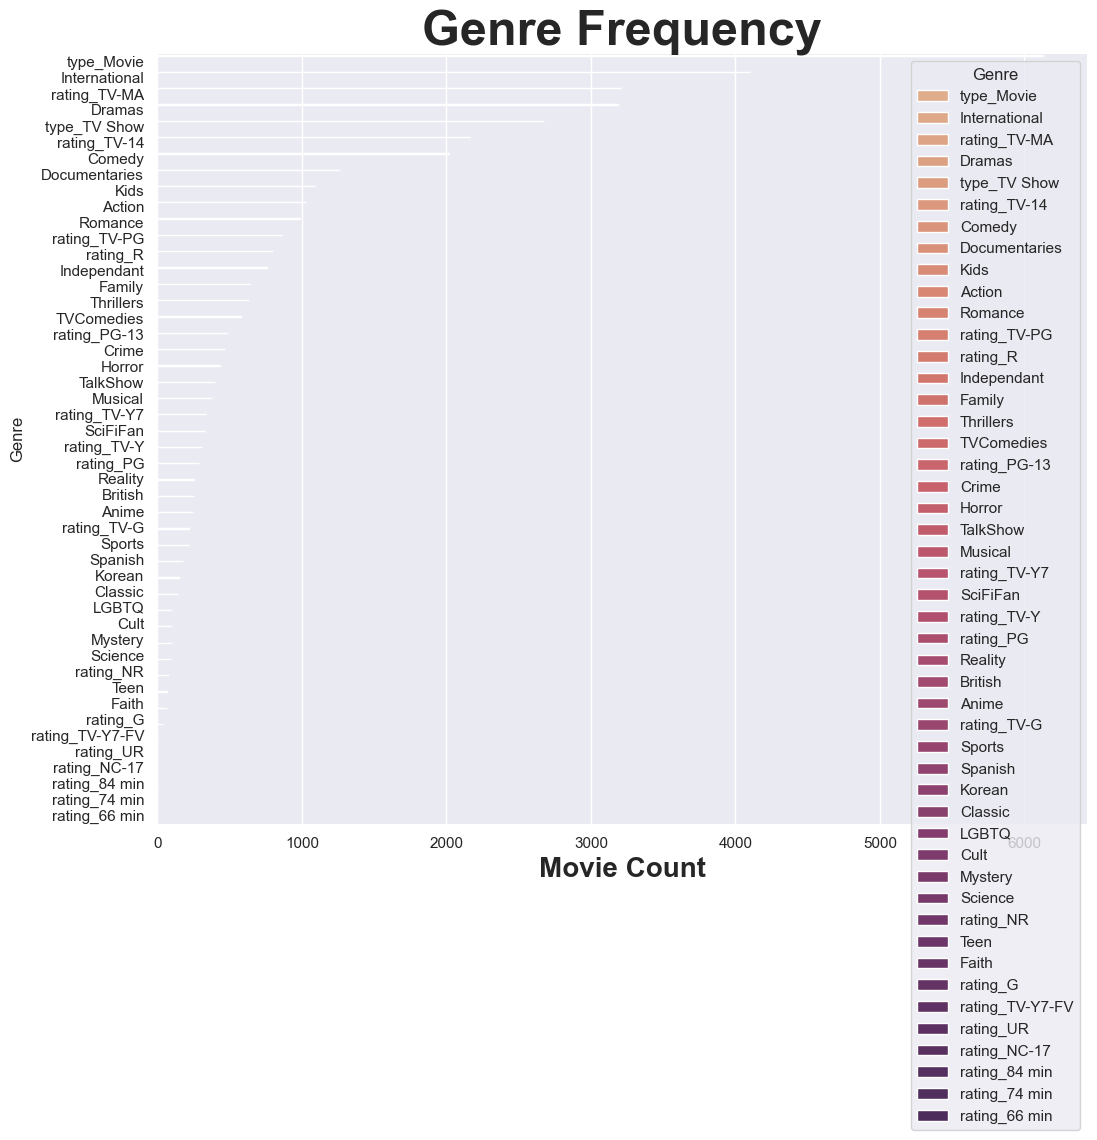

In [502]:
# Turning the series into a dataframe for the sake of the the next graph
df_genre_ratios = pd.DataFrame({'Genre':genre_ratios.index, 'Movie Count':genre_ratios.values}).sort_values("Movie Count", ascending=False)

# Plotting the number of each genre of movie
sns.set_theme(context="talk",style="dark")
plt.figure(figsize=(12, 10))

sns.set_theme(style="darkgrid")
fig = sns.barplot(data=df_genre_ratios,x='Movie Count',y='Genre',hue='Genre',palette="flare")
sns.despine(left=True, bottom=True)

plt.title('Genre Frequency',fontdict={'size':35,'weight':'bold'})

fig.xaxis.label.set_fontweight('bold')
fig.xaxis.label.set_fontsize(20)

plt.show()

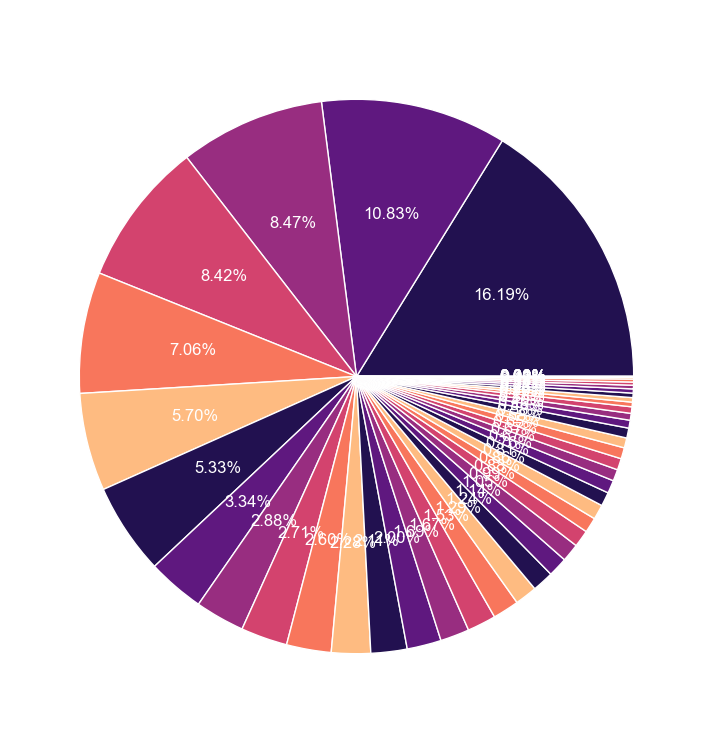

In [496]:
genre_ratios_reduced = df_genre_ratios['Movie Count']
plt.figure(figsize=(9,9))
plt.rcParams['text.color'] = 'w'

plt.pie(genre_ratios_reduced,
        labels=genre_ratios_reduced.index,
        colors=sns.color_palette('magma'),
        autopct='%.2f%%')
plt.title('Genre Frequency')

plt.show()

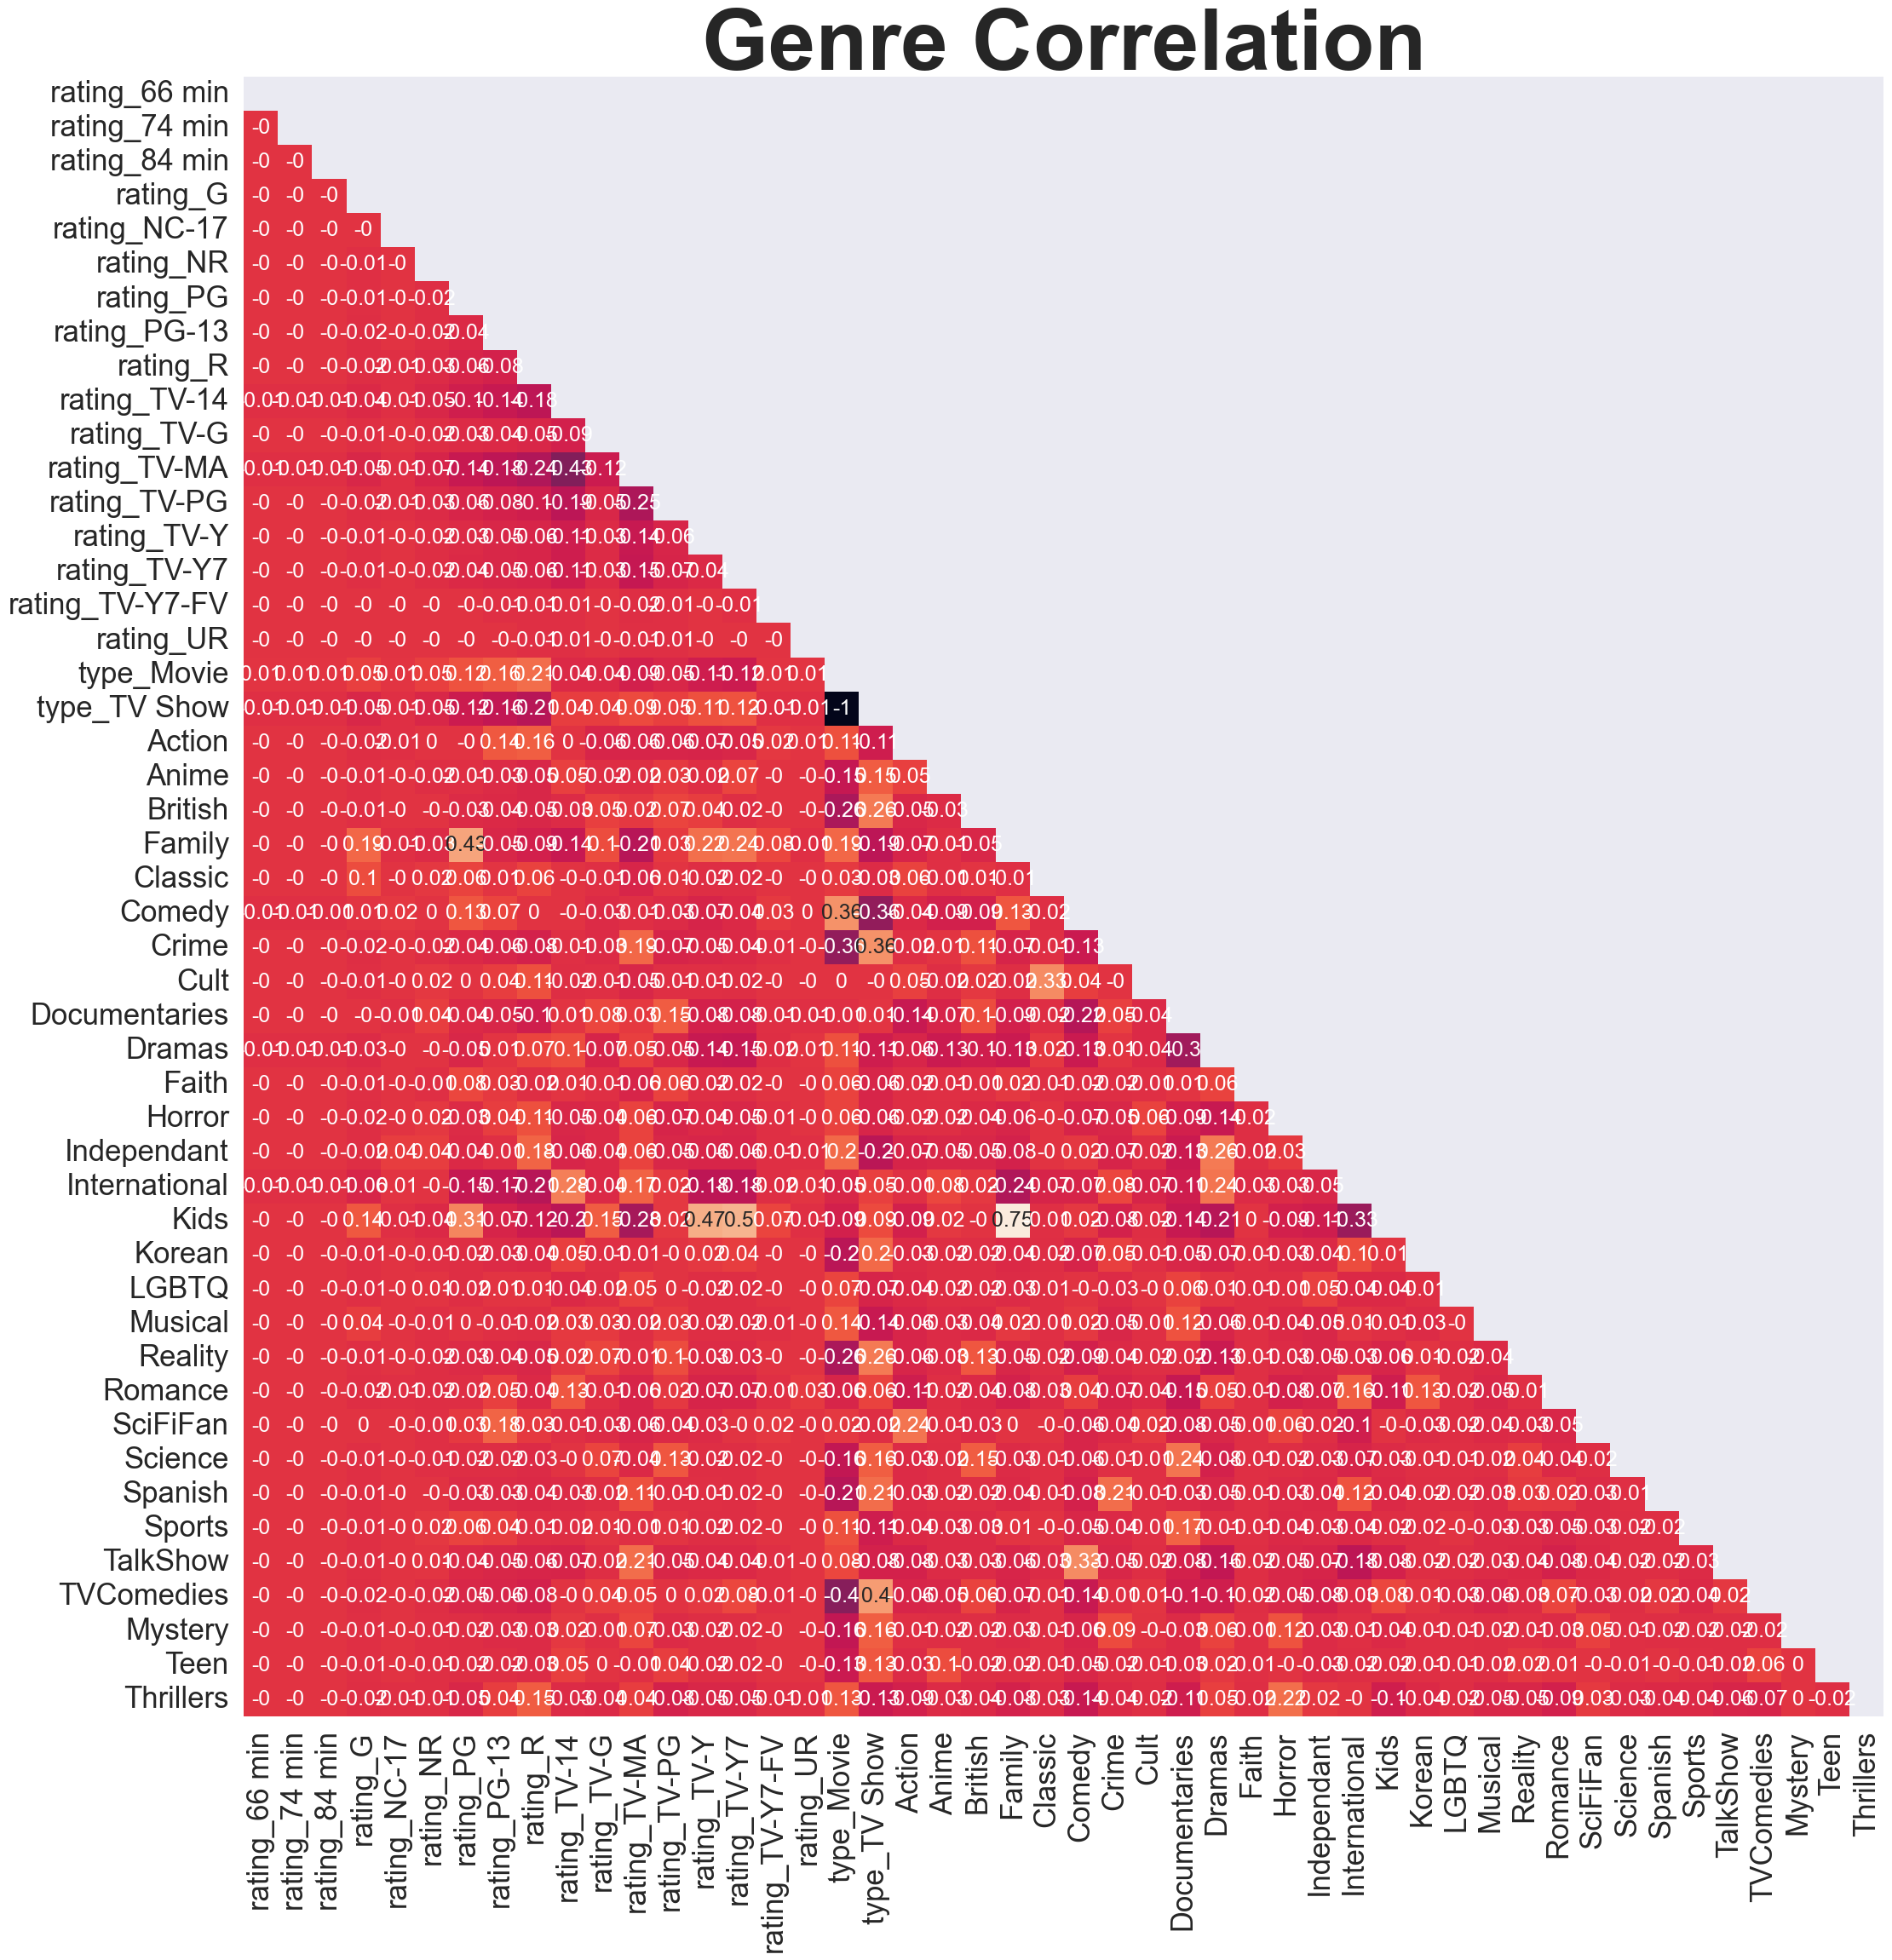

In [497]:
matrix = df_genres.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.set(rc={'figure.figsize':(25,25)})
sns.set_theme(context="talk",style="dark")

fig = sns.heatmap(matrix, annot=True, cbar=False, square=True, mask=mask)

fig.set_title('Genre Correlation',fontdict={'size':72,'weight':'bold'})
plt.rcParams['font.size'] = 10
fig.tick_params(axis='x',labelsize=25)
fig.tick_params(axis='y',labelsize=25)

plt.show()

### Cosine-Similarity Modeling

In [498]:
cosine_sim = cosine_similarity(df_genres)

### Recommendation System Function
- Check if the movie title exists in the DataFrame, then Get the index of the movie/show that matches the title. Once it is done we are getting the pairwise similarity scores of all movies/shows with that movie/show. Then we are sorting the moives or shows based on the similiartiy score. Then we are storing all the top most score in sim_scores and then we are setting the movide indices and based on that we are returning the title.

In [499]:
def get_recommendations(title, cosine_sim_matrix, df, top_n=10):

    if title not in df['title'].values:
        return "Movie title not found in the dataset."
    
    idx = df[df['title'] == title].index[0]

    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    
    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices]

movie_title = "Breaking Bad"
recommendations = get_recommendations(movie_title, cosine_sim, df)
print(recommendations)


1477                Dare Me
2767                  Ozark
3762    Designated Survivor
5940           Breaking Bad
668         Hap and Leonard
921                 StartUp
1059         House of Cards
1933              Wentworth
3065                Messiah
3525           Unbelievable
Name: title, dtype: object


# Enter Multiple TV Shows/Movies

In [500]:
def get_recommendations(title_list, cosine_sim_matrix, df, top_n=10):
    avg_sim_scores = np.zeros(len(df))

    for title in title_list:
        # Check if the title exists in the dataset
        if title not in df['title'].values:
            print("Warning: '{}' not found in the dataset.".format(title))
            continue
        
        # Get the index of the title in the DataFrame
        idx = df[df['title'] == title].index[0]
        sim_scores = cosine_sim_matrix[idx]
        
        # Add the similarity scores to the average scores array
        avg_sim_scores += sim_scores

    # Average the similarity scores across all titles in the input list
    avg_sim_scores /= len(title_list)
    movie_indices = np.argsort(avg_sim_scores)[::-1][:top_n]

    recommendations = df.iloc[movie_indices]['title']

    return recommendations

movie_titles = ["Henry Danger", "Inception", "Stranger Things"]
recommendations = get_recommendations(movie_titles, cosine_sim, df)
print(recommendations)

1465                       The Haunted Hathaways
1402                              Disenchantment
2190                        The Umbrella Academy
1473              Chilling Adventures of Sabrina
3685                             Stranger Things
4368    Mystery Science Theater 3000: The Return
7551                Mystery Science Theater 3000
2405                    DC's Legends of Tomorrow
2470                                   Supergirl
5263                                 Dark Matter
Name: title, dtype: object
